In [2]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import time
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Same features

We will train a CatBoost model on the Titanic dataset.

In [3]:
titanic = sns.load_dataset('titanic')
titanic['age'].fillna(titanic['age'].median(), inplace=True)

/var/folders/0w/2wvbn9xx39scmwd7157fzlw80000gn/T/ipykernel_84707/1519588536.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


In [168]:
titanic.drop(columns=['who', 'embarked', 'parch', 'fare', 
                      'deck', 'embark_town', 'alive',"alone"], inplace=True)

In [169]:
X = titanic.drop(columns=['survived'])
y = titanic['survived']

cat_features = ["sex", "class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [170]:
# Initialize CatBoost Classifier
catboost_model = CatBoostClassifier(iterations=1000, 
                                    learning_rate=0.05, 
                                    depth=6, 
                                    verbose=100)

# Train the model
catboost_model.fit(X_train, y_train, 
                   eval_set = (X_test, y_test),
                   cat_features=cat_features,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6580557	test: 0.6605953	best: 0.6605953 (0)	total: 12.3ms	remaining: 12.3s
100:	learn: 0.3623712	test: 0.4389407	best: 0.4342884 (54)	total: 169ms	remaining: 1.5s
200:	learn: 0.3290721	test: 0.4464352	best: 0.4342884 (54)	total: 324ms	remaining: 1.29s
300:	learn: 0.2948500	test: 0.4622076	best: 0.4342884 (54)	total: 476ms	remaining: 1.1s
400:	learn: 0.2705016	test: 0.4815637	best: 0.4342884 (54)	total: 639ms	remaining: 954ms
500:	learn: 0.2543097	test: 0.4819783	best: 0.4342884 (54)	total: 810ms	remaining: 807ms
600:	learn: 0.2365760	test: 0.5020827	best: 0.4342884 (54)	total: 1s	remaining: 665ms
700:	learn: 0.2223127	test: 0.5150031	best: 0.4342884 (54)	total: 1.2s	remaining: 513ms
800:	learn: 0.2089500	test: 0.5183471	best: 0.4342884 (54)	total: 1.44s	remaining: 358ms
900:	learn: 0.1998820	test: 0.5337496	best: 0.4342884 (54)	total: 1.6s	remaining: 176ms
999:	learn: 0.1909176	test: 0.5398363	best: 0.4342884 (54)	total: 1.78s	remaining: 0us

bestTest = 0.4342883903
bestIte

In [171]:
# Make predictions
y_pred_cb = catboost_model.predict(X_test)

# Evaluate the Cat_boost
cb_accuracy = accuracy_score(y_test, y_pred_cb)
print(f"CatBoost Accuracy: {cb_accuracy:.4f}")
print(classification_report(y_test, y_pred_cb))

CatBoost Accuracy: 0.8212
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       105
           1       0.86      0.68      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.82      0.82       179



# Other features

Try adding other categorical features. Does your accuracy improve?

In [4]:
titanic = sns.load_dataset('titanic')
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic.drop(columns=['who', "parch", "alive","alone", "deck", "embarked"], inplace=True)

/var/folders/0w/2wvbn9xx39scmwd7157fzlw80000gn/T/ipykernel_84707/2684019040.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


In [7]:
X = titanic.drop(columns=['survived'])
y = titanic['survived']

cat_features = ["sex", "class",  "embark_town",]
X[cat_features] = X[cat_features].astype(str).replace("nan","Boop")
X[cat_features] = X[cat_features].fillna("Boop")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize CatBoost Classifier
catboost_model = CatBoostClassifier(iterations=1000, 
                                    learning_rate=0.05, 
                                    depth=6, 
                                    verbose=100)

# Train the model
catboost_model.fit(X_train, y_train, 
                   eval_set = (X_test, y_test),
                   cat_features=cat_features,
                   plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6581604	test: 0.6597125	best: 0.6597125 (0)	total: 67.8ms	remaining: 1m 7s
100:	learn: 0.3482876	test: 0.4233265	best: 0.4232186 (98)	total: 217ms	remaining: 1.93s
200:	learn: 0.2916384	test: 0.4222672	best: 0.4200074 (186)	total: 354ms	remaining: 1.41s
300:	learn: 0.2437262	test: 0.4207457	best: 0.4187154 (244)	total: 511ms	remaining: 1.19s
400:	learn: 0.2106366	test: 0.4267774	best: 0.4187154 (244)	total: 676ms	remaining: 1.01s
500:	learn: 0.1800107	test: 0.4290173	best: 0.4187154 (244)	total: 831ms	remaining: 827ms
600:	learn: 0.1589776	test: 0.4323846	best: 0.4187154 (244)	total: 996ms	remaining: 661ms
700:	learn: 0.1419817	test: 0.4382693	best: 0.4187154 (244)	total: 1.16s	remaining: 494ms
800:	learn: 0.1287051	test: 0.4407800	best: 0.4187154 (244)	total: 1.31s	remaining: 325ms
900:	learn: 0.1167439	test: 0.4464775	best: 0.4187154 (244)	total: 1.46s	remaining: 161ms
999:	learn: 0.1053093	test: 0.4542332	best: 0.4187154 (244)	total: 1.62s	remaining: 0us

bestTest = 0.41

In [9]:
# Make predictions
y_pred_cb = catboost_model.predict(X_test)

# Evaluate the Cat_boost
cb_accuracy = accuracy_score(y_test, y_pred_cb)
print(f"CatBoost Accuracy: {cb_accuracy:.4f}")
print(classification_report(y_test, y_pred_cb))

CatBoost Accuracy: 0.8101
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



# Regression

### Now, you will try doing regression instead of classification. 
Using the California housing dataset, train regression models using Decision Trees, Random Forest, and CatBoost. Then, plot them using sns.regplot. If the points are annoying, set scatter = False. 

In [10]:
# Import necessary libraries
from catboost import CatBoostRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load the California housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target



In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoost regressor
model = CatBoostRegressor(iterations=4000, learning_rate=0.1, depth=6, verbose=100,)

# Fit the model to the training data
model.fit(X_train, y_train, plot=True,eval_set = (X_test, y_test),)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0916893	test: 1.0827828	best: 1.0827828 (0)	total: 3.74ms	remaining: 15s
100:	learn: 0.4856977	test: 0.5141492	best: 0.5141492 (100)	total: 166ms	remaining: 6.42s
200:	learn: 0.4317457	test: 0.4778063	best: 0.4778063 (200)	total: 331ms	remaining: 6.26s
300:	learn: 0.4010594	test: 0.4626636	best: 0.4626636 (300)	total: 541ms	remaining: 6.64s
400:	learn: 0.3779586	test: 0.4540902	best: 0.4540902 (400)	total: 826ms	remaining: 7.42s
500:	learn: 0.3608106	test: 0.4491909	best: 0.4491909 (500)	total: 1.03s	remaining: 7.18s
600:	learn: 0.3459401	test: 0.4454644	best: 0.4454644 (600)	total: 1.2s	remaining: 6.79s
700:	learn: 0.3332879	test: 0.4430853	best: 0.4430408 (699)	total: 1.37s	remaining: 6.46s
800:	learn: 0.3220272	test: 0.4405790	best: 0.4405790 (800)	total: 1.59s	remaining: 6.34s
900:	learn: 0.3119731	test: 0.4386333	best: 0.4386333 (900)	total: 1.75s	remaining: 6.04s
1000:	learn: 0.3024137	test: 0.4374077	best: 0.4373177 (980)	total: 1.92s	remaining: 5.76s
1100:	learn: 0.

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.18239371314171032


In [14]:
%%time

# Train the Decision Tree
decision_tree = DecisionTreeRegressor(random_state=42, max_depth=4)
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_dt = decision_tree.predict(X_test)


CPU times: user 65.2 ms, sys: 6.55 ms, total: 71.7 ms
Wall time: 78.4 ms


<Axes: >

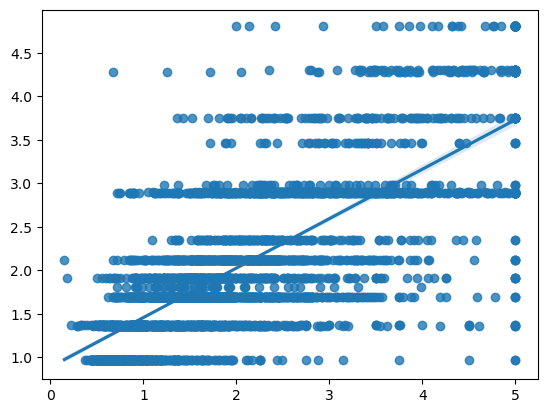

In [15]:
sns.regplot(x=y_test, y=y_pred_dt)

In [16]:
%%time
# Train the Random Forest
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)

CPU times: user 10.9 s, sys: 121 ms, total: 11 s
Wall time: 11.1 s


In [17]:
print("Decision Tree: ", np.corrcoef(y_test,y_pred_dt)[0,1])
print("Random Forest: ", np.corrcoef(y_test,y_pred_rf)[0,1])
print("Catboost: ", np.corrcoef(y_test,y_pred)[0,1])

Decision Tree:  0.7445739000316115
Random Forest:  0.8975174160828814
Catboost:  0.9278144522012132


<Axes: >

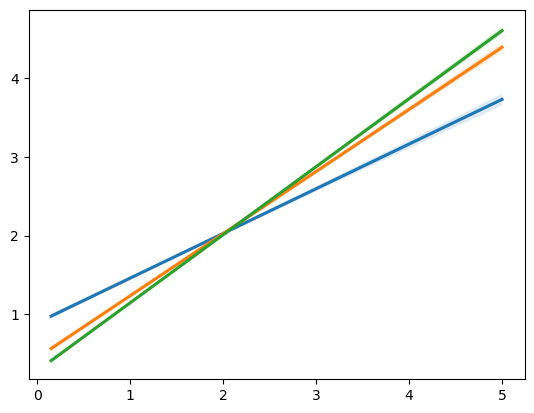

In [18]:
sns.regplot(x = y_test, y = y_pred_dt, scatter=False)
sns.regplot(x = y_test, y = y_pred_rf, scatter=False)
sns.regplot(x = y_test, y = y_pred, scatter=False)